In [114]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

In [115]:
class LogisticModel():
    
    def __init__(self, dataset, feature_dim, output_dim = 1, learning_rate = 0.04):
        self.w = np.random.normal(loc = 0, scale = 1, size = (feature_dim, output_dim))
        self.b = np.zeros((output_dim,1))
        #print(self.b)
        #print(self.w)
        self.beta = np.concatenate((self.w.transpose(), self.b), axis = 1)
        self.lr = learning_rate
        self.dataset = dataset
        #print(dataset)
        np.random.shuffle(self.dataset)
        self.validationset, self.trainset = np.split(self.dataset,[int(self.dataset.shape[0]/3)-1],axis = 0)
        #print("------")
        #print(self.beta)

    def logistic(z):
        return 1/(1 + math.exp(-z))

    def forward(self, x):
        # work as prediction process, actually not used in training
        x_hat = np.concatenate(x, np.ones((1, 1)), axis = 0)
        z = np.matmul(self.beta,x_hat)
        return logistic(z)

    def loss(self, dset):#要求传入dset，因为有可能有train 与 validation两种loss
        total_loss = 0
        data_x, data_y = np.split(dset,[dset.shape[1]-1],axis = 1)
        for i in range(0, dset.shape[0], 1):
            x = data_x[i]
            y = data_y[i]
            x = x.transpose()
            x = np.expand_dims(x, axis = 1)
            x_hat = np.concatenate((x, np.ones((1, 1))), axis = 0)
            total_loss = total_loss + (-y) * np.matmul(self.beta, x_hat) + math.log(1 + math.exp(np.matmul(self.beta, x_hat)))
        return total_loss

    def Gradient_decent(self, batchsize):
        gradient = 0.0
        data_x, data_y = np.split(self.trainset,[self.trainset.shape[1]-1],axis = 1)
        for j in range(0, batchsize, 1):
            x = data_x[j]
            y = data_y[j]
            x = x.transpose()
            #print("x.shape is ", x.shape)
            x = np.expand_dims(x, axis = 1)
            #print("x.shape is ", x.shape)
            x_hat = np.concatenate((x, np.ones((1, 1))), axis = 0)#这里的问题在于取出x的一行，x只有一个维度
            gradient = gradient + (-1) * x_hat * (y - (math.exp(np.matmul(self.beta,x_hat)))/(1 + math.exp(np.matmul(self.beta,x_hat))))
        return gradient

    def train(self, batchsize = 6, epoch = 300):
        TrainLoss = np.zeros((epoch))
        ValidationLoss = np.zeros((epoch))
        for i in range(0, epoch, 1):
            #print("-----------")
            #print("round = ", i)
            np.random.shuffle(self.trainset)# 检查这里是否改变了self.dataset,还是需要temp = np.random.shuffle(self.dataset)
            self.beta = self.beta - (self.Gradient_decent(batchsize) * self.lr).transpose()
            #print(self.beta)
            currentLoss = self.loss(self.trainset)
            #print("current loss is ", currentLoss)
            TrainLoss[i] = currentLoss
            ValidationLoss[i] = self.validation()
        
        self.display(TrainLoss, ValidationLoss)
    
    def validation(self):
        validationloss = self.loss(self.validationset)
        #print("the validation loss is ", validationloss)
        return validationloss

    def display(self, TrainLoss, ValidationLoss):
        epoch = TrainLoss.shape[0]
        epoch = np.arange(epoch)
        #epoch = np.expand_dims(epoch, axis = 0)
        plt.figure()
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.plot(epoch, TrainLoss, label = "Train", color = 'r')
        plt.plot(epoch, ValidationLoss, label = "Validation")
        plt.legend()
        #plt.savefig('/home/cyberimpart/cyf/ML_by_hand/f1.png') 
        #plt.show()

In [116]:
def main():
    """读入csv,并拆分为训练集与验证集 然后调用逻辑回归模型 进行训练"""
    #dataset = pd.read_csv('/home/cyberimpart/cyf/ML_by_hand/watermelon_cleared.csv')
    dataset = pd.read_csv('watermelon_cleared.csv')
    #print(dataset)
    dataset = np.array(dataset.values)
    #print(dataset)
    num, dataset = np.split(dataset,[1],axis = 1)
    #print(dataset)
    model = LogisticModel(dataset, 8)
    model.train()
    #print(model.beta)
    model.validation()

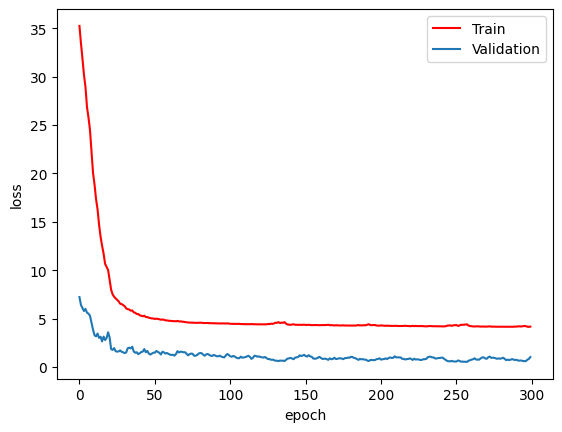

In [117]:
main()